# Лабораторная работа №3

### Выполнили: 
* Иванов Александр Константинович, 368220 
* Братушка Никита Игоревич, 367924
* Проворов Николай Дмитриевич, 368690


# Импорт необходимых библиотек

In [44]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc, accuracy_score, precision_score, recall_score, f1_score
from sklearn.neighbors import KNeighborsRegressor

## Классификация 

In [12]:
# загрузим датасет, подготовленный в лабораторной работе №1 
heartrates = pd.read_csv("heart_modified.csv")

heartrates.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.952197,1,3,0.763956,-0.256334,1,0,0.015443,0,1.087338,0,0,1,1
1,-1.915313,1,2,-0.092738,0.072199,0,1,1.633471,0,2.122573,0,0,2,1
2,-1.474158,0,1,-0.092738,-0.816773,0,0,0.977514,0,0.310912,2,0,2,1
3,0.180175,1,1,-0.663867,-0.198357,0,1,1.239897,0,-0.206705,2,0,2,1
4,0.290464,0,0,-0.663867,2.082050,0,1,0.583939,1,-0.379244,2,0,2,1


In [13]:
X = heartrates.drop("target", axis=1)
y = heartrates["target"]

# разделим данные на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 25)

In [17]:
# воспользуемся обучающей выборкой для построения логистической регрессии
# параметры оставим по умолчанию (https://scikit-learn.org/1.5/modules/generated/sklearn.linear_model.LogisticRegression.html)
# за исключением solver, так как авторы библиотеки рекомендуют использовать "liblinear" для маленьких датасетов

model = LogisticRegression(solver="liblinear") # For small datasets, ‘liblinear’ is a good choice, whereas ‘sag’ and ‘saga’ are faster for large ones;
model.fit(X_train, y_train)


LogisticRegression(solver='liblinear')

In [22]:
# оценим качество модели на тестовой выборке

y_hat = model.predict(X_test)
y_hat_proba = model.predict_proba(X_test) # вероятности принадлежности к классам 

print("Accuracy: ", model.score(X_test, y_test))
print("Precision: ", precision_score(y_test, y_hat))
print("Recall: ", recall_score(y_test, y_hat)) 
print("F1: ", f1_score(y_test, y_hat))



Accuracy:  0.7704918032786885
Precision:  0.75
Recall:  0.84375
F1:  0.7941176470588235


**ROC кривая** - это график, который показывает способность классификатора отличать один класс от другого. ROC кривая отображает соотношение между чувствительностью (вероятность правильного определения положительного класса) и специфичностью (вероятность правильного определения отрицательного класса) 

**AUC-ROC** - площадь под ROC-кривой. Чем ближе значение AUC-ROC к 1, тем лучше качество классификации. 

[       inf 0.99342696 0.96561476 0.95866942 0.87630909 0.87240873
 0.79722908 0.76317285 0.71630967 0.69327061 0.59637363 0.5934619
 0.57284277 0.54923972 0.45417818 0.08697639 0.08602889 0.08484388
 0.07893795 0.0347671  0.03328556 0.00108149]


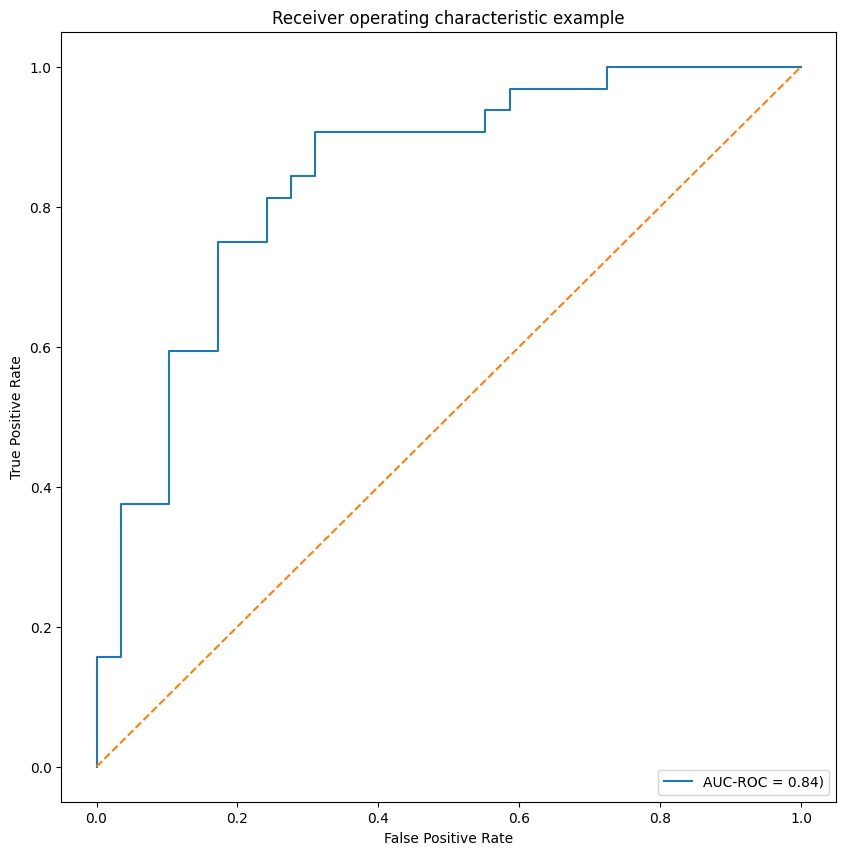

In [31]:
fpr, tpr, thresholds = roc_curve(y_test, y_hat_proba[:,1])
roc_auc = auc(fpr, tpr)
print(thresholds)

plt.figure(figsize=(10, 10))
plt.plot(fpr, tpr, label="AUC-ROC = %0.2f)" % roc_auc)
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic example")
plt.legend(loc="lower right")
plt.show()

Рассмотрим метрики при различных пороговых значениях вероятности для классификации. 


In [36]:
thresholds = [0.1, 0.2, 0.25, 0.35, 0.5, 0.8, 0.9, 0.95, 0.99]

results = []
for t in thresholds:
    y_hat = (y_hat_proba[:,1] > t).astype(int)
    results.append([t, accuracy_score(y_test, y_hat), precision_score(y_test, y_hat), recall_score(y_test, y_hat), f1_score(y_test, y_hat)])
    
results = pd.DataFrame(results, columns=["threshold", "accuracy", "precision", "recall", "f1"])
print(results)

   threshold  accuracy  precision   recall        f1
0       0.10  0.704918   0.659091  0.90625  0.763158
1       0.20  0.803279   0.763158  0.90625  0.828571
2       0.25  0.803279   0.763158  0.90625  0.828571
3       0.35  0.803279   0.763158  0.90625  0.828571
4       0.50  0.770492   0.750000  0.84375  0.794118
5       0.80  0.704918   0.850000  0.53125  0.653846
6       0.90  0.606557   0.900000  0.28125  0.428571
7       0.95  0.540984   0.833333  0.15625  0.263158
8       0.99  0.508197   1.000000  0.06250  0.117647


In [35]:
# на основе F1 метрики выберем оптимальный порог 

best_threshold = results.loc[results["f1"].idxmax()]["threshold"]
print("Best threshold: ", best_threshold)

Best threshold:  0.2


## Регрессия


In [38]:
sales = pd.read_csv('Advertising_modified.csv')

sales.head()

,TV,radio,newspaper,radio/(paper+radio),sales
0,0.969852,0.981522,1.778945,-0.380988,1.552053
1,-1.197376,1.082808,0.669579,0.102213,-0.696046
2,-1.516155,1.528463,1.783549,-0.186766,-0.907406
3,0.052050,1.217855,1.286405,-0.120586,0.860330
4,0.394182,-0.841614,1.281802,-1.228982,-0.215683


In [40]:
X = sales.drop("sales", axis=1)
y = sales["sales"]

# разделим данные на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 25)

Определим параметры для построения регрессора. 


In [57]:
params = {
    "n_neighbors": [1, 2, 5, 7, 10, 20],
    "weights": ["uniform", "distance"],
    "metric": ["euclidean", "cityblock", "chebyshev"] 
}

knn = KNeighborsRegressor()
# параметры (https://scikit-learn.org/1.5/modules/generated/sklearn.neighbors.KNeighborsRegressor.html)

grid = GridSearchCV(knn, params)
grid.fit(X_train, y_train)

print("Best params: ", grid.best_params_)

Best params:  {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'distance'}


In [60]:
# оценка на основе лучших параметров
best_model = grid.best_estimator_
y_hat = best_model.predict(X_test)

print("Accuracy: ", best_model.score(X_test, y_test))
print("MSE: ", np.mean((y_test - y_hat)**2))
print("MAE: ", np.mean(np.abs(y_test - y_hat)))
print("R2: ", best_model.score(X_test, y_test))

Accuracy:  0.9293375529407519
MSE:  0.07852993423491676
MAE:  0.21055535648944074
R2:  0.9293375529407519
